In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

DEBUG = False

In [2]:
def generate_map(w, h, seed=3):
    n = 1
    p = 0.25
    N = w * h
    return np.random.binomial(n, p, N).reshape(w, h)

grid = generate_map(9, 9)
print(grid)

def randomly_pick_start_loc(grid, seed):
    np.random.seed(seed)
    x, y = np.random.randint(0, w, 1)[0], np.random.randint(0, h, 1)[0]
    while grid[y, x] == 1:
        x, y = np.random.randint(0, w, 1)[0], np.random.randint(0, h, 1)[0]
    return np.array([y, x]).flatten()

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [0 0 1 1 0 1 0 1 0]
 [1 0 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 1 1 1]]


In [3]:
def is_out_of_bounds(grid_shape, y, x):
    return x < 0 or x > grid_shape[1] - 1 or y < 0 or y > grid_shape[0] - 1

# Note: Be careful of Tail Recursion Elimination
import sys
recursion_limit = sys.getrecursionlimit()
print('Stack recursion limit: ', recursion_limit)
LIMIT = 15000
if recursion_limit < LIMIT:
    sys.setrecursionlimit(LIMIT)
print('Stack recursion limit: ', sys.getrecursionlimit())
   
# TODO
def bfs(grid, start_loc, end_loc, trajectories, idx):
    if np.equal(start_loc, end_loc).all():
        trajectories[idx].append(end_loc)
        return trajectory
    
    directions = [
        [start_loc[1], start_loc[1] - 1],
        [start_loc[1], start_loc[1] + 1],
        [start_loc[1] - 1, start_loc[1]],
        [start_loc[1] + 1, start_loc[1]],
    ]
    
    for idx in range(len(directions)):
        if directions[idx] not in trajectories[idx] and not is_out_of_bounds(grid.shape, directions[idx][0], directions[idx][1]) and grid[directions[idx][0], directions[idx][1]] == 0:
            trajectories[idx].append(directions[idx])
            trajectories[idx] = backtrack(grid, directions[idx], end_loc, trajectories, idx)
    
    return trajectory

def dfs(grid, start_loc, end_loc, trajectory):
    if np.equal(start_loc, end_loc).all():
        trajectory.append(end_loc)
        return trajectory
    
    left = [start_loc[0], start_loc[1] - 1]
    if left not in trajectory and not is_out_of_bounds(grid.shape, left[0], left[1]) and grid[left[0], left[1]] == 0:
        if DEBUG:
            print('go left')
        trajectory.append(left)
        trajectory = dfs(grid, left, end_loc, trajectory)
    
    right = [start_loc[0], start_loc[1] + 1]
    if right not in trajectory and not is_out_of_bounds(grid.shape, right[0], right[1]) and grid[right[0], right[1]] == 0:
        if DEBUG:
            print('go right')
        trajectory.append(right)
        trajectory = dfs(grid, right, end_loc, trajectory)
    
    up = [start_loc[0] - 1, start_loc[1]]
    if up not in trajectory and not is_out_of_bounds(grid.shape, up[0], up[1]) and grid[up[0], up[1]] == 0:
        if DEBUG:
            print('go up')
        trajectory.append(up)
        trajectory = dfs(grid, up, end_loc, trajectory)
    
    down = [start_loc[0] + 1, start_loc[1]]
    if down not in trajectory and not is_out_of_bounds(grid.shape, down[0], down[1]) and grid[down[0], down[1]] == 0:
        if DEBUG:
            print('go down')
        trajectory.append(down)
        trajectory = dfs(grid, down, end_loc, trajectory)
        
    return trajectory
    

def plan_path(grid, start_loc, end_loc, ftype='dfs'):
    ''' Find path trajectory from start_loc to end_loc. '''
    if ftype == 'bfs':
        trajectory = [
            [start_loc],
            [start_loc],
            [start_loc],
            [start_loc]
        ]
        return bfs(grid, start_loc, end_loc, trajectory, 0)
    elif ftype == 'dfs':
        trajectory = [start_loc]
        return dfs(grid, start_loc, end_loc, trajectory)
    elif ftype == 'Dijkstra':
        #TODO
        raise NotImplementedError
    elif ftype == 'A*':
        #TODO
        raise NotImplementedError
    elif ftype == 'RL':
        # TODO
        raise NotImplementedError
    else:
        raise('More functions to come')

Stack recursion limit:  3000
Stack recursion limit:  15000


[[0 0 0 0 0]
 [1 0 1 1 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 1]]
Find path from [4, 3] to [0, 2]:

[[4, 3], [3, 3], [3, 2], [3, 1], [3, 0], [4, 0], [4, 1], [2, 2], [2, 3], [2, 4], [1, 4], [0, 4], [0, 3], [0, 2], [0, 2], [3, 4]]


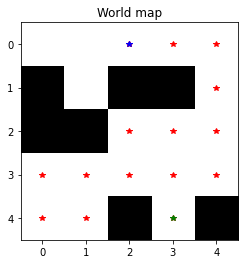

In [4]:
w, h = 5, 5
#grid = generate_map(w, h)
grid = np.array([
    [0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1]])
print(grid)
start_loc = [4, 3]#list(randomly_pick_start_loc(grid, 1))
end_loc = [0, 2]#list(randomly_pick_start_loc(grid, 3))
print(f'Find path from {start_loc} to {end_loc}:\n')

plt.title('World map')
plt.imshow(grid, cmap='binary')

trajectory = plan_path(grid, start_loc, end_loc, 'dfs')
print(trajectory)
[ plt.plot(coord[1], coord[0], 'r*') for coord in trajectory ]

plt.plot(start_loc[1], start_loc[0], 'g*')
plt.plot(end_loc[1], end_loc[0], "b*")